In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/cancer_diagnosis_data.csv")
print(data.head())
print(data.info())
print(data)

                             Patient_ID  Age  Gender  Tumor_Size(cm)  \
0  c044501a-43ca-4a0c-8b8b-991439ba1b6a   52  Female            5.08   
1  b8900c4c-1232-4084-9432-5d02eba74d20   32  Female            0.80   
2  3004e2bc-8037-49cb-a542-d5612b73beab   70  Female            9.56   
3  1df86af7-6745-4dea-b127-cbc9915079fc   21  Female            3.07   
4  128e00c3-72e3-4031-a7f4-1165d7199cce   62    Male            7.17   

  Tumor_Type Biopsy_Result          Treatment Response_to_Treatment  \
0     Benign      Positive            Surgery           No Response   
1     Benign      Negative            Surgery     Complete Response   
2     Benign      Positive  Radiation Therapy     Complete Response   
3  Malignant      Negative            Surgery      Partial Response   
4  Malignant      Positive  Radiation Therapy     Complete Response   

  Survival_Status  
0        Survived  
1        Survived  
2        Deceased  
3        Survived  
4        Deceased  
<class 'pandas.core.

Explained Variance Ratio: [0.50219614 0.49780386]
Number of components: 2
Similar Patient Indices: [  772  9836 12755 11492 14986]
Similarity Distances: [1.99820928e-08 1.72149192e-07 1.76435523e-07 1.76435523e-07
 2.48760230e-07]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


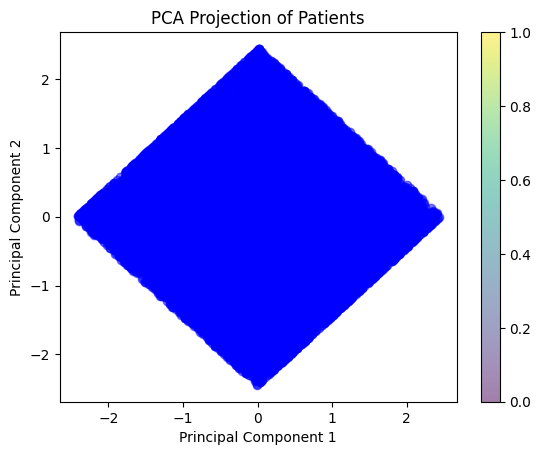

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/MyDrive/cancer_diagnosis_data.csv'
data = pd.read_csv(file_path)

# Assuming the dataset has a target column named 'diagnosis'
if 'diagnosis' in data.columns:
    X = data.drop(['diagnosis'], axis=1)  # Features
    y = data['diagnosis']  # Target
else:
    X = data
    y = None

# Drop non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
X = X.drop(non_numeric_cols, axis=1)

# Split into training and testing sets if there’s a target variable
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dimensionality reduction with PCA
pca = PCA(n_components=0.95)  # Adjust n_components based on dataset size
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)

# Fit KNN model for finding similar patients
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model.fit(X_train_pca)

# Function to find similar patients
def find_similar_patients(patient_data, model, pca_model):
    patient_data_scaled = scaler.transform([patient_data])
    patient_data_pca = pca_model.transform(patient_data_scaled)
    distances, indices = model.kneighbors(patient_data_pca)
    return indices[0], distances[0]

# Test with a sample patient from test data
sample_patient = X_test[0]  # Replace this with specific patient data if needed
similar_indices, similar_distances = find_similar_patients(sample_patient, knn_model, pca)
print("Similar Patient Indices:", similar_indices)
print("Similarity Distances:", similar_distances)

# Optional: Visualization of PCA-reduced data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train if y is not None else 'b', alpha=0.5)
plt.title("PCA Projection of Patients")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Diagnosis" if y is not None else "")
plt.show()
